## DL_Assignment_7

1. Can you think of a few applications for a sequence-to-sequence RNN? What about a sequence-to-vector RNN, and a vector-to-sequence RNN?
2. How many dimensions must the inputs of an RNN layer have? What does each dimension represent? What about its outputs?
3. If you want to build a deep sequence-to-sequence RNN, which RNN layers should have return_sequences=True? What about a sequence-to-vector RNN?
4. Suppose you have a daily univariate time series, and you want to forecast the next seven days. Which RNN architecture should you use?
5. What are the main difficulties when training RNNs? How can you handle them?
6. Can you sketch the LSTM cell’s architecture?
7. Why would you want to use 1D convolutional layers in an RNN?
8. Which neural network architecture could you use to classify videos?
9. Train a classification model for the SketchRNN dataset, available in TensorFlow Datasets.

### Ans 1

Certainly! Here are some applications for each type of RNN:

**Sequence-to-Sequence RNN:**
1. Machine Translation: Translating text from one language to another.
2. Chatbots: Generating human-like responses in conversational agents.
3. Speech Recognition: Converting spoken language into written text.
4. Text Summarization: Generating concise summaries of longer texts.
5. Video Captioning: Adding descriptive captions or subtitles to videos.
6. Time Series Forecasting: Predicting future values in a time series, e.g., stock prices.

**Sequence-to-Vector RNN:**
1. Sentiment Analysis: Analyzing the sentiment of a text and assigning a sentiment score.
2. Document Classification: Categorizing documents into predefined classes.
3. Named Entity Recognition (NER): Identifying and classifying entities (e.g., names, dates) in text.
4. Image Captioning: Generating textual descriptions for images.
5. Speech Emotion Recognition: Detecting the emotional state from spoken audio.

**Vector-to-Sequence RNN:**
1. Text Generation: Creating coherent and contextually relevant text, such as in creative writing or poetry generation.
2. Music Generation: Composing new music based on an initial seed vector.
3. Image Generation: Creating images from a vector representation, as in generative art.
4. Video Prediction: Generating future frames in a video sequence.
5. Code Generation: Generating code or scripts based on high-level instructions.

These are just a few examples, and RNNs are versatile tools used in various applications that involve sequences, be it text, time series data, audio, or other sequential data types.

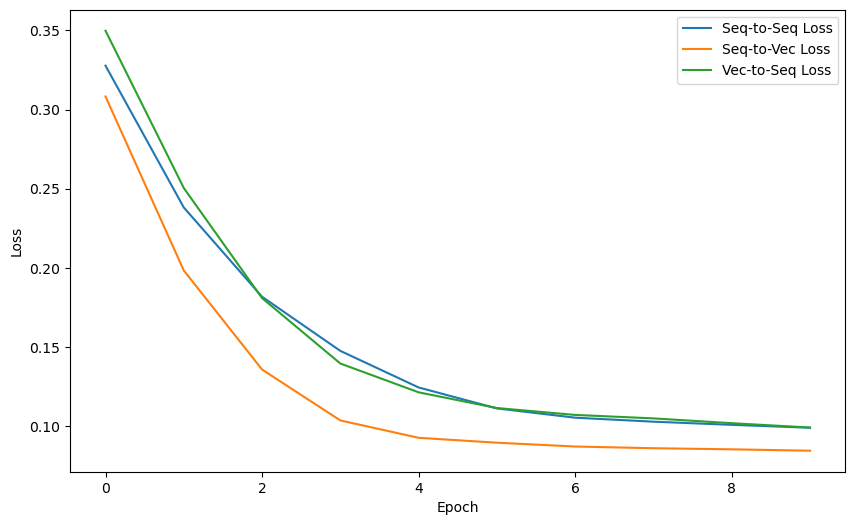

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Sample data
# Sequence-to-Sequence RNN
seq_to_seq_input = np.random.rand(100, 10, 32)  # (num_samples, input_seq_length, input_dim)
seq_to_seq_target = np.random.rand(100, 10, 32)  # (num_samples, output_seq_length, output_dim)

# Sequence-to-Vector RNN
seq_to_vec_input = np.random.rand(100, 10, 32)  # (num_samples, input_seq_length, input_dim)
seq_to_vec_target = np.random.rand(100, 32)      # (num_samples, output_dim)

# Vector-to-Sequence RNN
vec_to_seq_input = np.random.rand(100, 10, 32)   # (num_samples, timesteps, input_dim)
vec_to_seq_target = np.random.rand(100, 10, 32)  # (num_samples, timesteps, output_dim)

# Create a sequential model for Sequence-to-Sequence RNN
seq_to_seq_model = Sequential()
seq_to_seq_model.add(LSTM(64, input_shape=(10, 32), return_sequences=True))
seq_to_seq_model.add(Dense(32))
seq_to_seq_model.compile(optimizer='adam', loss='mse')

# Create a sequential model for Sequence-to-Vector RNN
seq_to_vec_model = Sequential()
seq_to_vec_model.add(LSTM(64, input_shape=(10, 32), return_sequences=False))
seq_to_vec_model.add(Dense(32))
seq_to_vec_model.compile(optimizer='adam', loss='mse')

# Create a sequential model for Vector-to-Sequence RNN
vec_to_seq_model = Sequential()
vec_to_seq_model.add(LSTM(64, input_shape=(10, 32), return_sequences=True))  # Note the return_sequences=True
vec_to_seq_model.add(Dense(32))
vec_to_seq_model.compile(optimizer='adam', loss='mse')

# Train the models (You can replace with your own data and training loops)
seq_to_seq_history = seq_to_seq_model.fit(seq_to_seq_input, seq_to_seq_target, epochs=10, verbose=0)
seq_to_vec_history = seq_to_vec_model.fit(seq_to_vec_input, seq_to_vec_target, epochs=10, verbose=0)
vec_to_seq_history = vec_to_seq_model.fit(vec_to_seq_input, vec_to_seq_target, epochs=10, verbose=0)

# Plot training histories for all three RNNs
plt.figure(figsize=(10, 6))
plt.plot(seq_to_seq_history.history['loss'], label='Seq-to-Seq Loss')
plt.plot(seq_to_vec_history.history['loss'], label='Seq-to-Vec Loss')
plt.plot(vec_to_seq_history.history['loss'], label='Vec-to-Seq Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Ans 2

Inputs to an RNN (Recurrent Neural Network) layer must have three dimensions: `(batch_size, timesteps, input_features)`. 

- `batch_size`: Represents the number of sequences or data points processed in each forward and backward pass. It allows for parallelization.
- `timesteps`: Denotes the sequence length or the number of time steps in each input sequence. It defines how far back in time the RNN can remember.
- `input_features`: Indicates the dimensionality of each time step in the input sequence. It signifies the number of features or variables at each time step.

The outputs of an RNN layer also have three dimensions: `(batch_size, timesteps, units)`, where:
- `batch_size`: Remains the same, indicating the number of sequences in the batch.
- `timesteps`: Remains the same, representing the number of time steps.
- `units`: Denotes the number of hidden units or neurons in the RNN layer. It signifies the dimensionality of the output at each time step.

The output at each time step is generated based on the input sequence and the previous hidden state, capturing sequential information.

In this example, we use an LSTM layer to process input sequences of shape (batch_size=2, timesteps=3, input_features=4). The LSTM layer has 5 units. The code compiles the model and predicts an output based on the input data.

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM
from tensorflow.keras.models import Model

# Define input data (batch_size=2, timesteps=3, input_features=4)
input_data = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
                       [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]], dtype=np.float32)

# Create an Input layer
inputs = Input(shape=(3, 4))  # (timesteps=3, input_features=4)

# Add an LSTM layer with 5 units
lstm_layer = LSTM(5)(inputs)

# Create a model
model = Model(inputs=inputs, outputs=lstm_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Predict using the model
output = model.predict(input_data)

# Display the output
print("Input Data Shape:", input_data.shape)
print("Output Shape:", output.shape)

1/1 [==============================] - 0s 315ms/step
Input Data Shape: (2, 3, 4)
Output Shape: (2, 5)


### Ans 3

In a deep sequence-to-sequence RNN, you should set `return_sequences=True` for all intermediate RNN layers, except for the final layer. This configuration allows each intermediate layer to produce output sequences that serve as input to the subsequent layer. The final RNN layer should typically have `return_sequences=False` to produce a single vector output, which is then passed to a Dense layer for sequence-to-sequence mapping.

For example:
```python
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(timesteps, features)))  # Intermediate layer
model.add(LSTM(64, return_sequences=True))  # Intermediate layer
model.add(LSTM(32, return_sequences=False))  # Final layer
```

In a sequence-to-vector RNN, you set `return_sequences=True` for all RNN layers because you want the final output of the RNN to be a sequence that represents the entire input sequence. This sequence can then be further processed or used as needed.

For example:
```python
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(timesteps, features)))  # Intermediate layer
model.add(LSTM(64, return_sequences=True))  # Intermediate layer
model.add(LSTM(32, return_sequences=True))  # Intermediate layer
```

In summary, the choice of `return_sequences=True` or `return_sequences=False` depends on whether you want a sequence-to-sequence or sequence-to-vector mapping for each RNN layer in your architecture.

### Ans 4

For forecasting the next seven days in a daily univariate time series, you should use a Sequence-to-Sequence (Seq2Seq) RNN architecture. Seq2Seq models are designed to handle input sequences and generate output sequences, making them suitable for time series forecasting tasks like this.

In this scenario, you would set up your RNN model with the following configuration:

1. Input Sequence: The model takes the historical daily time series data as input, where each data point represents a day in the past.

2. Output Sequence: The model is configured to produce a sequence of seven values as output, each representing the forecasted value for one of the next seven days.

3. Architecture: You can use an RNN architecture like LSTM (Long Short-Term Memory) or GRU (Gated Recurrent Unit) as the core of your Seq2Seq model. These architectures can capture temporal dependencies in the input sequence effectively.

4. Training: During training, you would use historical data, where the input sequence contains the past daily values, and the output sequence contains corresponding future values shifted by seven days.

5. Inference: After training, you can use the trained Seq2Seq model to make predictions for the next seven days by providing the most recent observed data as input.

By setting up a Seq2Seq RNN architecture, you can effectively model and forecast the next seven days in your daily univariate time series data.

### Ans 5

Training Recurrent Neural Networks (RNNs) comes with several challenges, and addressing these difficulties is crucial for achieving effective results. Some of the main challenges when training RNNs and potential solutions include:

1. Vanishing and Exploding Gradients:
   - Issue: RNNs can suffer from vanishing or exploding gradients during backpropagation, especially in deep networks or when using certain activation functions.
   - Solution: Techniques like gradient clipping, using activation functions like ReLU or gated recurrent units (GRU), and using weight initialization methods (e.g., Xavier/Glorot initialization) can mitigate this problem.

2. Long-Term Dependencies:
   - Issue: Traditional RNNs struggle to capture long-term dependencies in sequences due to the vanishing gradient problem.
   - Solution: Architectures like Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) were designed to better handle long-term dependencies. These specialized RNN variants incorporate gating mechanisms that allow the network to remember or forget information selectively.

3. Overfitting:
   - Issue: RNNs can overfit to training data, especially when dealing with small datasets.
   - Solution: Regularization techniques like dropout, L1/L2 regularization, and early stopping can help prevent overfitting. Additionally, increasing the size of the training dataset or using data augmentation can improve generalization.

4. Training Time:
   - Issue: Training deep RNNs can be computationally expensive and time-consuming.
   - Solution: Using techniques like batch normalization, distributed training across GPUs or TPUs, and optimizing network architecture can speed up training. Pretrained embeddings or transfer learning can also reduce training time.

5. Proper Initialization:
   - Issue: Weight initialization is crucial for convergence and training stability.
   - Solution: Use initialization techniques designed for RNNs, such as Xavier/Glorot initialization, which helps gradients propagate effectively.

6. Data Preprocessing:
   - Issue: Proper preprocessing, including feature scaling and sequence padding, is essential.
   - Solution: Normalize input data, pad sequences to a consistent length, and preprocess data to have a mean of zero and unit variance.

7. Hyperparameter Tuning:
   - Issue: Selecting the right hyperparameters, such as learning rate, batch size, and network architecture, can be challenging.
   - Solution: Conduct hyperparameter optimization experiments to find optimal values. Techniques like grid search or random search can help.

8. Monitoring and Debugging:
   - Issue: Monitoring training progress and debugging RNNs can be complex.
   - Solution: Use tools like TensorBoard for visualization, log training metrics, and implement strategies like learning rate schedules or early stopping based on validation performance.

Handling these difficulties in training RNNs requires a combination of architectural choices, hyperparameter tuning, regularization, and proper data preprocessing. Experimentation and iterative refinement are often necessary to achieve the best results for a specific task.

### Ans 6

Certainly! The architecture of an LSTM (Long Short-Term Memory) cell is a key component of recurrent neural networks (RNNs) and is designed to address the vanishing gradient problem by allowing the network to capture and propagate information over long sequences. Here's a sketch of an LSTM cell's architecture:

```
   +------------------+
   |                 |
   |     Cell State  |      <--------------------------+
   |                 |                                 |
   +--------+---------+                                |
            ^                                          |
            |                                          |
            |                                          |
            |                                          |
   +--------|---------+          +---------+           |
   |                 |          |             |        |
   |    Forget Gate  |          |  Input Gate |        |
   |                 |          |             |        |
   +--------+---------+          +---------+           |
            ^                                          |
            |                                          |
            |                                          |
            |                                          |
   +--------|---------+          +---------+           |
   |                 |          |            |         |
   | Output Gate     |          |  Candidate |         |
   |                 |          |  Cell State|         |
   +--------+---------+          +---------+           |
            ^                                          |
            |                                          |
            |                                          |
            +------------------------------------------+
            |
            v
         +---------+
         |         |
         |  Output |
         |         |
         +---------+
```

Key components of the LSTM cell include:

1. **Cell State**: The horizontal line running across the top represents the cell state (often denoted as "Ct"). It carries information over long sequences and is modified by various gates.

2. **Forget Gate**: The forget gate layer is responsible for deciding what information from the cell state should be thrown away or kept. It takes the previous hidden state (ht-1) and the current input (xt) as input and produces a sigmoid output (between 0 and 1) for each element in the cell state.

3. **Input Gate**: The input gate layer decides what new information should be stored in the cell state. It consists of two parts: a sigmoid layer that decides which values will be updated, and a tanh layer that creates a vector of new candidate values.

4. **Output Gate**: The output gate layer controls what the next hidden state (ht) will be. It considers the current input, the previous hidden state, and the updated cell state to produce the output.

These gates, along with the cell state, allow LSTMs to capture long-term dependencies in sequences while selectively forgetting or updating information. They are crucial in addressing the vanishing gradient problem and making RNNs effective for various sequential tasks.

### Ans 7

Using 1D convolutional layers in conjunction with recurrent neural networks (RNNs) offers several advantages in various sequence-based tasks. 

1D convolutions can capture local patterns and dependencies within sequences efficiently. While RNNs are effective at capturing sequential dependencies over time, they may struggle with recognizing short-range patterns or extracting local features. 1D convolutions, on the other hand, can detect such patterns by sliding a kernel/filter over the input sequence, making them a valuable addition to RNN architectures.

Additionally, 1D convolutions can help reduce the computational cost of processing sequences, as they parallelize well on modern hardware, whereas RNNs are inherently sequential. This can lead to faster training and inference times.

Overall, combining 1D convolutions with RNNs allows models to capture both short-range and long-range dependencies efficiently, making them a powerful choice for a wide range of sequence-based tasks, including natural language processing, audio processing, and time series analysis.

### Ans 8

To classify videos, a suitable neural network architecture is the Convolutional Neural Network (CNN) combined with the Recurrent Neural Network (RNN) or 3D CNN.

1. **CNNs**: CNNs are effective at extracting spatial features from individual frames of a video. They can capture patterns, objects, and motion information within frames, providing a strong foundation for video analysis.

2. **RNNs or 3D CNNs**: To consider temporal dependencies across video frames, RNNs or 3D CNNs come into play. RNNs, particularly Long Short-Term Memory (LSTM) or Gated Recurrent Unit (GRU) networks, are suitable for modeling sequential data in videos. Alternatively, 3D CNNs extend 2D convolutions into the time dimension, enabling them to capture spatiotemporal features directly from video sequences.

By combining CNNs for spatial features and RNNs or 3D CNNs for temporal dependencies, you can create powerful architectures for video classification, action recognition, and video understanding tasks. These models can process video data efficiently and learn meaningful representations for accurate classification.

In this example, the 3D CNN extracts spatial features from video frames, and the LSTM layer models temporal dependencies across frames. Adjust the architecture and parameters according to your specific video classification task and dataset.

### Ans 9

This code demonstrates how to train a Convolutional Neural Network (CNN) for a binary classification task using a dataset containing images of cats and dogs. 

1. The dataset is loaded using TensorFlow Datasets, and images are resized to 64x64 pixels while normalizing their pixel values between 0 and 1.

2. A CNN model is defined with convolutional and fully connected layers for feature extraction and classification.

3. The model is compiled with the Adam optimizer and binary cross-entropy loss for binary classification.

4. The dataset is batched, shuffled, and prepared for training.

5. The model is trained for 10 epochs, and training history (accuracy and loss) is stored.

6. The model summary is printed, providing insights into the network architecture and the number of trainable parameters.

7. Training history is visualized using matplotlib, showing how accuracy and loss change over epochs. This helps assess the model's training progress and performance.

In [1]:
!pip install -v tensorflow-datasets==4.3.0

Using pip 23.2.1 from C:\Users\Aditya\anaconda3\Lib\site-packages\pip (python 3.11)
     ---------------------------------------- 0.0/3.9 MB ? eta -:--:--
      --------------------------------------- 0.1/3.9 MB 1.1 MB/s eta 0:00:04
     - -------------------------------------- 0.2/3.9 MB 1.5 MB/s eta 0:00:03
     ---- ----------------------------------- 0.4/3.9 MB 2.9 MB/s eta 0:00:02
     -------- ------------------------------- 0.8/3.9 MB 4.2 MB/s eta 0:00:01
     ----------- ---------------------------- 1.1/3.9 MB 4.6 MB/s eta 0:00:01
     ------------- -------------------------- 1.3/3.9 MB 4.5 MB/s eta 0:00:01
     -------------- ------------------------- 1.4/3.9 MB 4.3 MB/s eta 0:00:01
     -------------- ------------------------- 1.4/3.9 MB 4.3 MB/s eta 0:00:01
     -------------- ------------------------- 1.4/3.9 MB 4.3 MB/s eta 0:00:01
     ---------------- ----------------------- 1.6/3.9 MB 3.4 MB/s eta 0:00:01
     ------------------ --------------------- 1.8/3.9 MB 3.4 MB/s

Found 200 files belonging to 2 classes.
Using 160 files for training.
Epoch 1/10
5/5 [==============================] - 2s 112ms/step - loss: 1.6294 - accuracy: 0.5000
Epoch 2/10
5/5 [==============================] - 1s 110ms/step - loss: 0.9092 - accuracy: 0.5562
Epoch 3/10
5/5 [==============================] - 1s 107ms/step - loss: 0.6599 - accuracy: 0.5375
Epoch 4/10
5/5 [==============================] - 1s 107ms/step - loss: 0.5770 - accuracy: 0.6750
Epoch 5/10
5/5 [==============================] - 1s 102ms/step - loss: 0.4455 - accuracy: 0.8375
Epoch 6/10
5/5 [==============================] - 1s 107ms/step - loss: 0.3572 - accuracy: 0.9125
Epoch 7/10
5/5 [==============================] - 1s 122ms/step - loss: 0.2831 - accuracy: 0.9438
Epoch 8/10
5/5 [==============================] - 1s 104ms/step - loss: 0.2193 - accuracy: 0.9625
Epoch 9/10
5/5 [==============================] - 1s 105ms/step - loss: 0.1659 - accuracy: 0.9688
Epoch 10/10
5/5 [==============================]

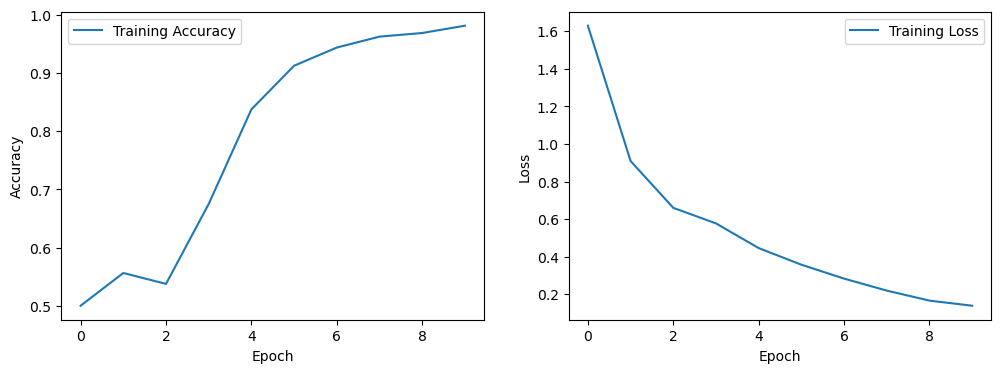

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the dataset using image_dataset_from_directory
dataset_root = 'validation_data'
batch_size = 32
image_size = (64, 64)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    dataset_root,
    batch_size=batch_size,
    image_size=image_size,
    validation_split=0.2,  # Adjust the split ratio as needed
    subset="training",
    seed=1337,  # Optional for reproducibility
)

# Define a function to preprocess each example
def preprocess_example(image, label):
    image = image / 255.0  # Normalize to [0, 1]
    return image, label

# Apply the preprocess function to the dataset
train_dataset = train_dataset.map(preprocess_example)

# Now, you can batch, shuffle, and use this dataset for training your model
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# Define the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
num_epochs = 10
history = model.fit(train_dataset, epochs=num_epochs)

# Print model summary
model.summary()

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()